# Задачи
	
Используя приложенный массив данных на вкладке "Массив данных" необходимо провести следующий анализ:	
	
	
1.	Проведите корреляционный и регрессионный анализ разных факторов относительно функции урожайности:
а	MAX NDVI (колонка L) и Урожайность (колонка J); 
б	MAX NDVI" (колонка L) и Средняя Урожайность (колонка Q)
в	День выезда по факту (колонка H) и Урожайность (колонка J) для операций посева (колонка E)
г	Химический состав поля (колонки M, N, O, P) и Урожайность (колонка J)
д	Факторы погоды (колонки S, T, U) и Урожайность (колонка J)
	
2. 	Постройте модель зависимости урожайности (колонка J) от факторов температура (колонка S), влага (T), накопленная влага (U), гибрид (K)
	Оцените качество модели
	
3.	Оцените, как повлияет на модель, построенную в пункте 2, учет таких факторов как день выезда для операций посева, вид используемой техники
	
4.	Оцените качество данных: очистите их от статистических выбросов и проверьте, где данные являются статистически незначимыми


## 1.1 Импорт библиотек

In [1]:
# вызов библиотеки pandas
import pandas as pd
# импорт библиотеки numpy
import numpy as np
# импорт библиотеки seaborn
import seaborn as sns
# импорт библиотеки scipy
from scipy import stats as st
import scipy
from scipy.stats import pearsonr
from scipy.stats import linregress

# импорт библиотеки sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score

#statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# импорт библиотеки warnings
import warnings
warnings.filterwarnings("default", category=FutureWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# импорт библиотеки matplotlib
import matplotlib.pyplot as plt
from matplotlib.colorbar import colorbar_factory

%matplotlib inline

## 1.2 Чтение данных и сохранение в переменные

In [2]:
xlsx = pd.ExcelFile('Тестовые задачи.XLSX')
df = pd.read_excel(xlsx, 'Массив данных')

# 2. Подготовка данных (4.	Оцените качество данных: очистите их от статистических выбросов и проверьте, где данные являются статистически незначимыми)

Проведем подготовку данных и оценку качества данных (п.4) перед выполнением п.п. 1 - 3 задания, так как целесообразнее использовать подготовленные данные для проведения анализа.

In [3]:
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Номерной знак ТС              1792 non-null   int64         
 1   Название объекта              1792 non-null   object        
 2   Название объекта.1            1789 non-null   float64       
 3   Имя сотр./кандидата           1792 non-null   int64         
 4   Тех.операция                  1792 non-null   object        
 5   Поле                          1792 non-null   int64         
 6   Кол-во ГА                     1792 non-null   float64       
 7   День выезда по факту          1792 non-null   datetime64[ns]
 8   Культура 2021                 1792 non-null   object        
 9   Урожайность т/га              1792 non-null   float64       
 10  Гибрид                        1792 non-null   object        
 11  Макс NDVI                     

,Номерной знак ТС,Название объекта,Название объекта.1,Имя сотр./кандидата,Тех.операция,Поле,Кол-во ГА,День выезда по факту,Культура 2021,Урожайность т/га,...,Макс NDVI,Фосфор,Калий,Азот,Гумус,Ср.Ур-сть т/га,Диапазон Мин NDVI,℃ в Период цветения,"Влага в период вегетации, мм","Накопленная влага всего, мм"
0,6,Беларус 82.1,9.0,1,Боронование,1,27.00,2021-05-27,Подсолнечник,1.955862,...,0.67,51.40,370.0,82.6,6.9,1.64,"0,4-0,5",0,0,0
1,6,Беларус 82.1,18.0,1,Первая междурядная культивация,1,7.00,2021-06-25,Подсолнечник,1.955862,...,0.67,51.40,370.0,82.6,6.9,1.64,"0,4-0,5",0,0,0
2,20,John Deere 8430,11.0,5,Культивация (6-8 см),1,27.00,2021-05-24,Подсолнечник,1.955862,...,0.67,51.40,370.0,82.6,6.9,1.64,"0,4-0,5",0,0,0
3,8,Беларус 82.1,9.0,9,Боронование,1,27.00,2021-06-01,Подсолнечник,1.955862,...,0.67,51.40,370.0,82.6,6.9,1.64,"0,4-0,5",0,0,0
4,8,Беларус 82.1,18.0,9,Первая междурядная культивация,1,6.00,2021-06-25,Подсолнечник,1.955862,...,0.67,51.40,370.0,82.6,6.9,1.64,"0,4-0,5",0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,26,Claas Tucano 450,6.0,20,"Уборка подсолнечника 1,5-2,0 т/га",33,12.90,2021-09-19,Подсолнечник,1.626667,...,0.67,24.55,337.5,66.5,8.2,1.64,"0,4-0,5",37,181,378
1788,23,Claas Tucano 450,6.0,22,"Уборка подсолнечника 1,5-2,0 т/га",33,11.47,2021-09-19,Подсолнечник,1.626667,...,0.67,24.55,337.5,66.5,8.2,1.64,"0,4-0,5",37,181,378
1789,19,John Deere 8430,13.0,27,Дискование (8-12 см),33,43.00,2021-10-16,Подсолнечник,1.626667,...,0.67,24.55,337.5,66.5,8.2,1.64,"0,4-0,5",37,181,378
1790,19,John Deere 8430,13.0,27,Дискование (8-12 см),33,34.00,2021-10-17,Подсолнечник,1.626667,...,0.67,24.55,337.5,66.5,8.2,1.64,"0,4-0,5",37,181,378


Из приведенной выше таблицы можно сделать следующие выводы:
- набор данных включает 1792 наблюдение и 21 признак;

- 15 признаков - числовые, 5 - категориальные, 1 - временной. По своей сути признаки "Номерной знак ТС", "Название объекта", "Название объекта.1", "Имя сотр./кандидата", "Поле" можно также отнести к категориальным.

Проверим, есть ли пропущенные значения в каждой переменной.

In [4]:
display(df.isnull().sum())

Номерной знак ТС                 0
Название объекта                 0
Название объекта.1               3
Имя сотр./кандидата              0
Тех.операция                     0
Поле                             0
Кол-во ГА                        0
День выезда по факту             0
Культура 2021                    0
Урожайность т/га                 0
Гибрид                           0
Макс NDVI                        0
Фосфор                           0
Калий                            0
Азот                             0
Гумус                            0
Ср.Ур-сть т/га                  83
Диапазон Мин NDVI               83
℃ в Период цветения              0
Влага в период вегетации, мм     0
Накопленная влага всего, мм      0
dtype: int64

Признак "Название объекта.1" содержит 3 пропуска, данные этого признака не информативны для анализа, удалим столбец полностью.
Столбцы "Ср.Ур-сть т/га", "Диапазон Мин NDVI" содержат по 83 пропущенных значения в одних и тех же наблюдениях. В виду их незначительного количества (менее 5%) удалим строки с пропусками. 

In [5]:
df = df.drop(columns = 'Название объекта.1')
df.head(1)

,Номерной знак ТС,Название объекта,Имя сотр./кандидата,Тех.операция,Поле,Кол-во ГА,День выезда по факту,Культура 2021,Урожайность т/га,Гибрид,Макс NDVI,Фосфор,Калий,Азот,Гумус,Ср.Ур-сть т/га,Диапазон Мин NDVI,℃ в Период цветения,"Влага в период вегетации, мм","Накопленная влага всего, мм"
0,6,Беларус 82.1,1,Боронование,1,27.0,2021-05-27,Подсолнечник,1.955862,П-64-Ф66,0.67,51.4,370.0,82.6,6.9,1.64,"0,4-0,5",0,0,0


In [6]:
df = df.dropna(axis='index', how='any', subset=['Ср.Ур-сть т/га', 'Диапазон Мин NDVI'])

In [7]:
display(df.count())

Номерной знак ТС                1709
Название объекта                1709
Имя сотр./кандидата             1709
Тех.операция                    1709
Поле                            1709
Кол-во ГА                       1709
День выезда по факту            1709
Культура 2021                   1709
Урожайность т/га                1709
Гибрид                          1709
Макс NDVI                       1709
Фосфор                          1709
Калий                           1709
Азот                            1709
Гумус                           1709
Ср.Ур-сть т/га                  1709
Диапазон Мин NDVI               1709
℃ в Период цветения             1709
Влага в период вегетации, мм    1709
Накопленная влага всего, мм     1709
dtype: int64

После удаления незаполненных значений признаков "Ср.Ур-сть т/га", "Диапазон Мин NDVI" осталось 1709 наблюдения.

Посчитаем количество уникальных значений 

In [8]:
df.nunique()

Номерной знак ТС                 28
Название объекта                  9
Имя сотр./кандидата              29
Тех.операция                     24
Поле                             27
Кол-во ГА                       539
День выезда по факту            152
Культура 2021                     1
Урожайность т/га                 27
Гибрид                            3
Макс NDVI                        10
Фосфор                           27
Калий                            26
Азот                             24
Гумус                            23
Ср.Ур-сть т/га                    3
Диапазон Мин NDVI                 3
℃ в Период цветения               9
Влага в период вегетации, мм     11
Накопленная влага всего, мм       7
dtype: int64

Уберем дубликаты

In [9]:
df=df.drop_duplicates(keep=False)
display(df.count())

Номерной знак ТС                1625
Название объекта                1625
Имя сотр./кандидата             1625
Тех.операция                    1625
Поле                            1625
Кол-во ГА                       1625
День выезда по факту            1625
Культура 2021                   1625
Урожайность т/га                1625
Гибрид                          1625
Макс NDVI                       1625
Фосфор                          1625
Калий                           1625
Азот                            1625
Гумус                           1625
Ср.Ур-сть т/га                  1625
Диапазон Мин NDVI               1625
℃ в Период цветения             1625
Влага в период вегетации, мм    1625
Накопленная влага всего, мм     1625
dtype: int64

После очистки пропущенных значений и удаления дубликатов осталось 1625 записей.

In [10]:
le_MinNDVI = LabelEncoder()
le_MinNDVI.fit(df['Диапазон Мин NDVI'])
df['Диапазон Мин NDVI'] = le_MinNDVI.transform(df['Диапазон Мин NDVI'])

Построим гистограммы распределения числовых параметров, предварительно убрав неинформативные.

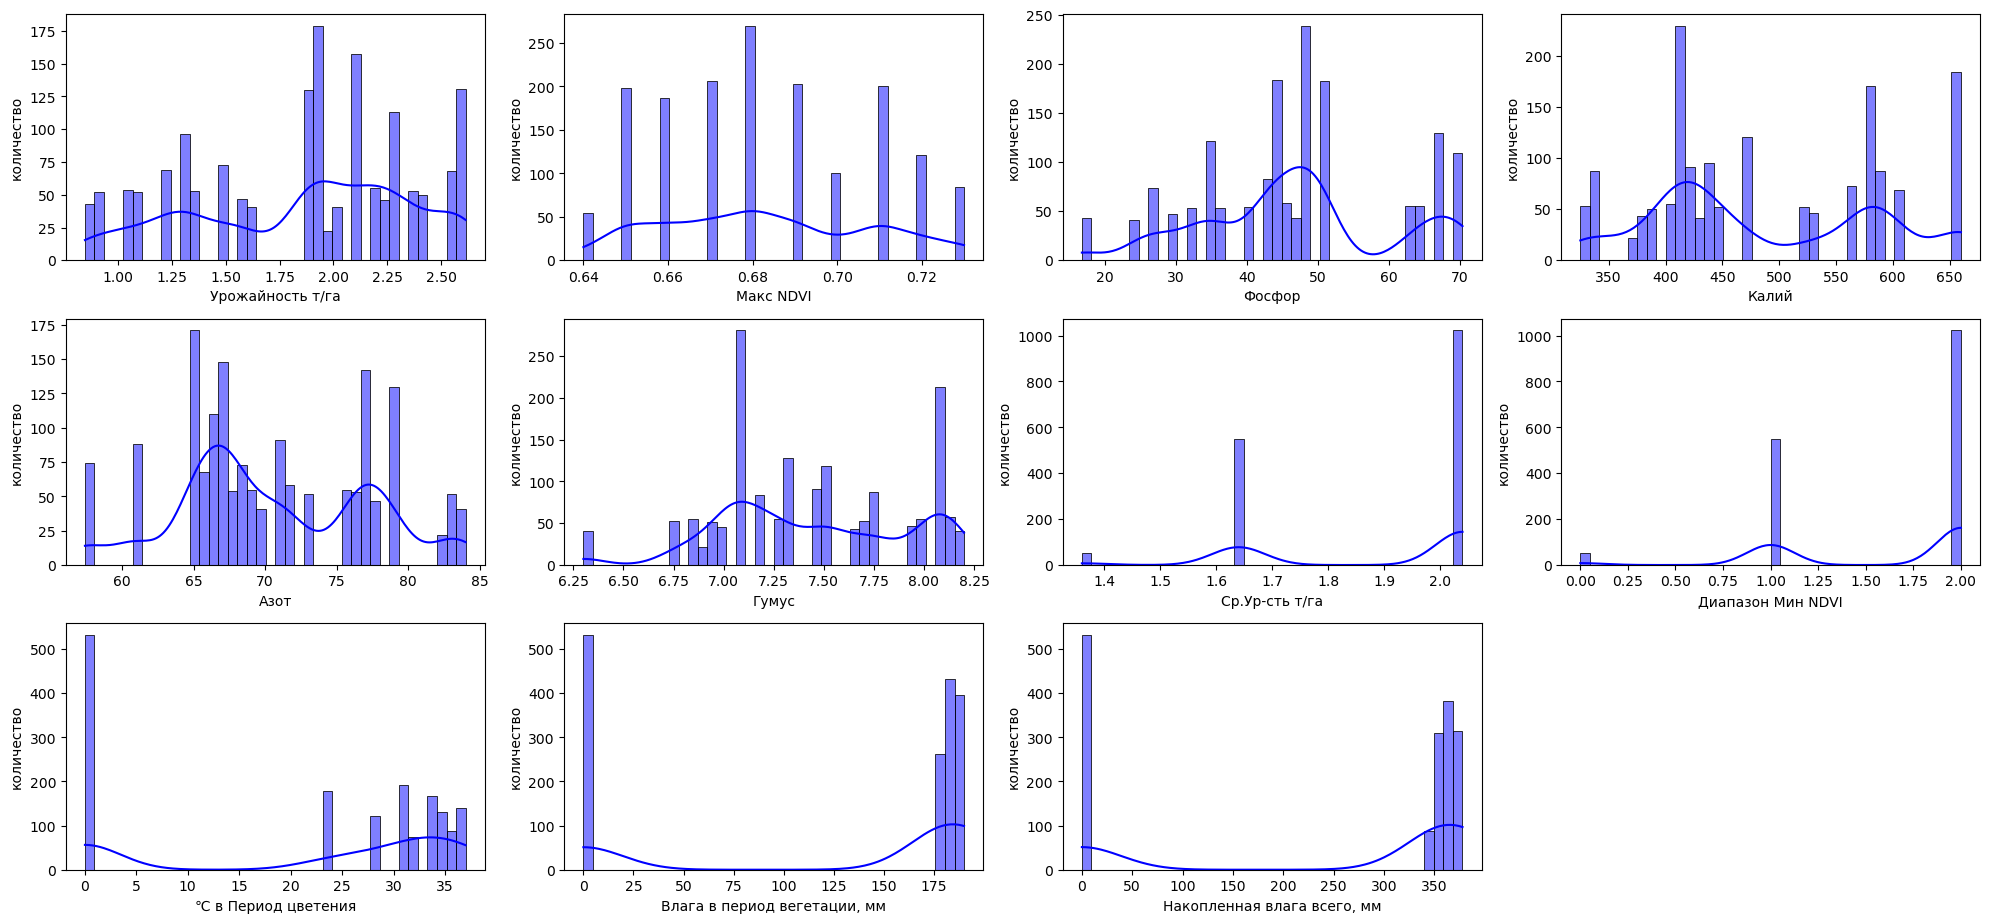

In [11]:
feature_cols = df.columns.drop(['Номерной знак ТС', 'Название объекта', 'Имя сотр./кандидата',
                                'Тех.операция', 'Поле', 'Кол-во ГА', 'День выезда по факту', 
                                'Культура 2021', 'Гибрид'])

def histogram (df, n_rows, n_cols):
    fig=plt.figure(figsize=(20, 15))
    for i, column in enumerate(df.columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.histplot(data=df, x=column, kde=True, bins=40, color = 'blue')
        plt.ylabel('количество')
    fig.tight_layout()
    plt.show()

histogram(df[feature_cols], 5, 4)

Из представленных числовых признаков лишь "Макс NDVI", а также "Влага в период вегетации, мм", "Накопленная влага всего, мм" имеют распределение близкое к нормальному согласно куполообразной форме графика. Следует отмеить, что показатели "℃ в Период цветения", "Влага в период вегетации, мм", "Накопленная влага всего, мм" имеют вид распрделения близкий к нормальному без учета нулевых значений.

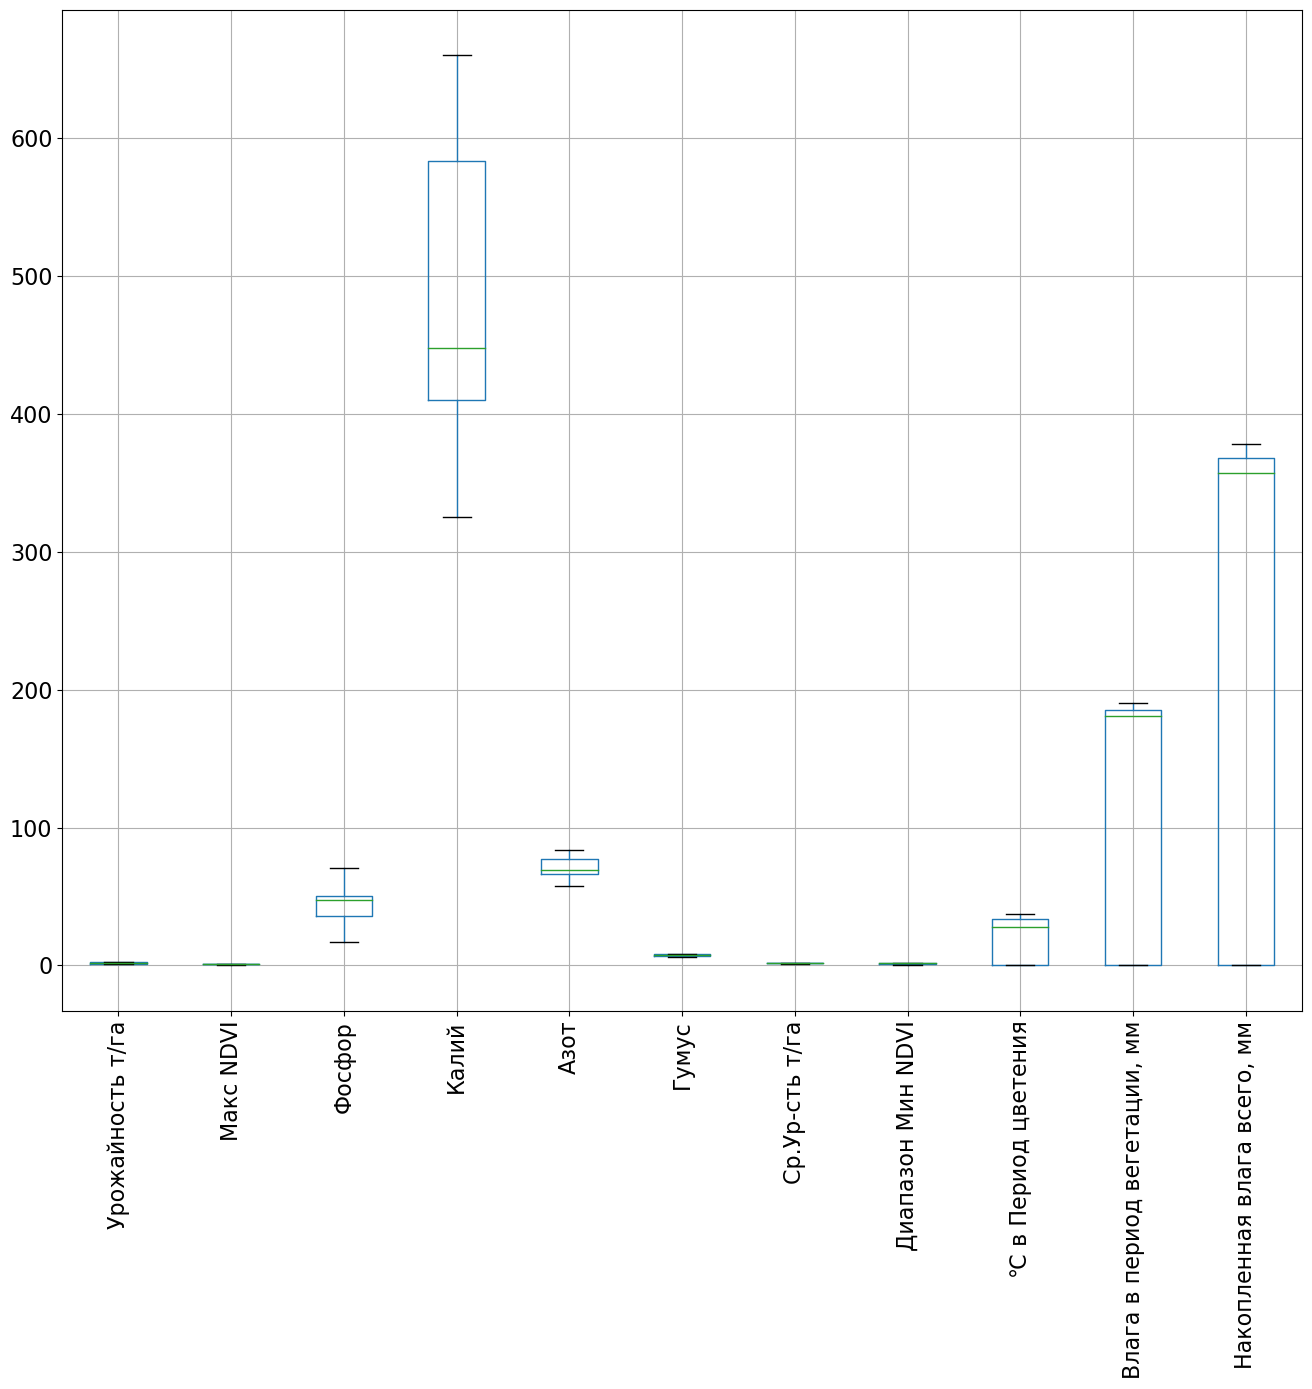

In [12]:
feature_cols = df.columns.drop(['Номерной знак ТС', 'Название объекта', 'Имя сотр./кандидата',
                                'Тех.операция', 'Поле', 'Кол-во ГА', 'День выезда по факту', 
                                'Культура 2021', 'Гибрид'])
 
df[feature_cols].boxplot(rot=90, figsize=(16,13))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Исходя из графика "ящик с усами" выбросов нет.

# 3. (1.)	Проведите корреляционный и регрессионный анализ разных факторов относительно функции урожайности:
### а	MAX NDVI (колонка L) и Урожайность (колонка J); 

Построим график рассеяния

Text(0, 0.5, 'Урожайность т/га')

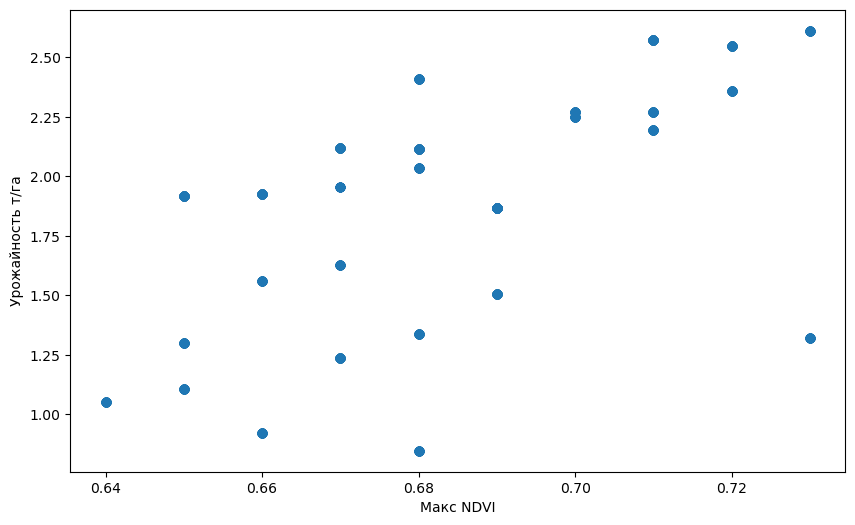

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['Макс NDVI'], y = df['Урожайность т/га'])
plt.xlabel("Макс NDVI")
plt.ylabel("Урожайность т/га")

Рассчитаем коэффициент корреляции Пирсона и двустороннее p-значение:

In [14]:
pearsonr(df['Макс NDVI'], df['Урожайность т/га'])

PearsonRResult(statistic=0.6091478332872204, pvalue=1.208680958170265e-165)

Исходя из графика рассеяния (прослеживается прямая линия зависимости) и коэффициента Пирсона~0.6,  а также двустороннего p-значение меньше 5%, мы можем заключить, что существует статистически значимая корреляция между двумя признаками

###	б MAX NDVI" (колонка L) и Средняя Урожайность (колонка Q)

Построим график рассеяния

Text(0, 0.5, 'Ср.Ур-сть т/га')

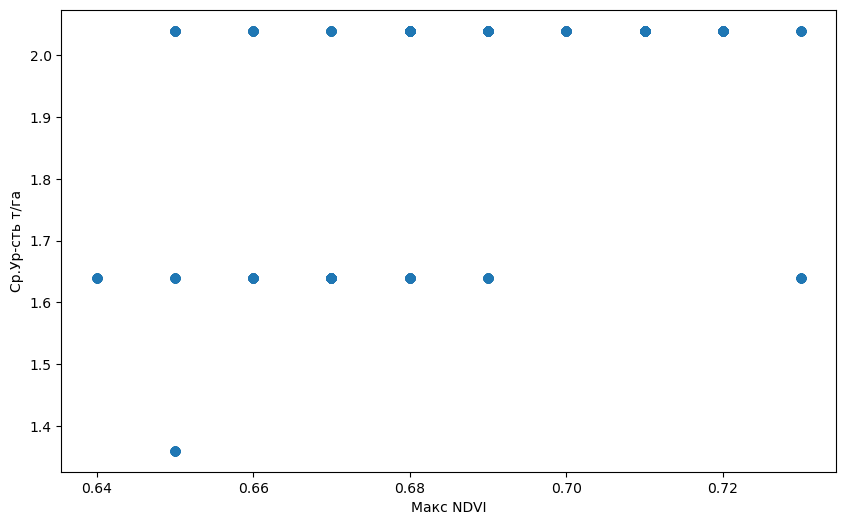

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['Макс NDVI'], y = df['Ср.Ур-сть т/га'])
plt.xlabel("Макс NDVI")
plt.ylabel("Ср.Ур-сть т/га")

Рассчитаем коэффициент корреляции Пирсона и двустороннее p-значение:

In [16]:
pearsonr(df['Макс NDVI'], df['Ср.Ур-сть т/га'])

PearsonRResult(statistic=0.42854082524744497, pvalue=1.420462997914456e-73)

Исходя из графика рассеяния и коэффициента Пирсона = 0.43,  а также двустороннего p-значение меньше 5%, мы можем заключить, что существует статистически значимая корреляция между двумя признаками. Однако данная связь меньше, чем связь между признаками MAX NDVI (колонка L) и Урожайность (колонка J).

### в	День выезда по факту (колонка H) и Урожайность (колонка J) для операций посева (колонка E)

Сделаем отбор операций посева

In [17]:
df1 = df[df['Тех.операция'] == 'Посев пропашных культур'].copy()
df1

,Номерной знак ТС,Название объекта,Имя сотр./кандидата,Тех.операция,Поле,Кол-во ГА,День выезда по факту,Культура 2021,Урожайность т/га,Гибрид,Макс NDVI,Фосфор,Калий,Азот,Гумус,Ср.Ур-сть т/га,Диапазон Мин NDVI,℃ в Период цветения,"Влага в период вегетации, мм","Накопленная влага всего, мм"
11,5,John Deere 8430,23,Посев пропашных культур,1,27.0,2021-05-27,Подсолнечник,1.955862,П-64-Ф66,0.67,51.4000,370.0,82.6000,6.90,1.64,1,0,0,0
26,5,John Deere 8430,10,Посев пропашных культур,2,59.0,2021-05-26,Подсолнечник,2.196790,П-64-Ф66,0.71,44.0000,410.0,75.6000,8.00,2.04,2,0,0,0
27,5,John Deere 8430,10,Посев пропашных культур,2,49.0,2021-05-27,Подсолнечник,2.196790,П-64-Ф66,0.71,44.0000,410.0,75.6000,8.00,2.04,2,0,0,0
45,5,John Deere 8430,23,Посев пропашных культур,2,65.0,2021-05-26,Подсолнечник,2.196790,П-64-Ф66,0.71,44.0000,410.0,75.6000,8.00,2.04,2,0,0,0
67,5,John Deere 8430,10,Посев пропашных культур,4,11.0,2021-05-27,Подсолнечник,2.035269,П-64-Ф66,0.68,44.2000,430.0,70.0000,7.20,2.04,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,19,John Deere 8430,27,Посев пропашных культур,32,3.0,2021-05-19,Подсолнечник,1.562080,ЕС Генезис,0.66,29.3325,340.0,77.4675,7.93,1.64,1,37,180,378
1115,19,John Deere 8430,27,Посев пропашных культур,32,69.0,2021-05-21,Подсолнечник,1.562080,ЕС Генезис,0.66,29.3325,340.0,77.4675,7.93,1.64,1,37,180,378
1123,5,John Deere 8430,10,Посев пропашных культур,33,4.0,2021-05-19,Подсолнечник,1.626667,ЕС Генезис,0.67,24.5500,337.5,66.5000,8.20,1.64,1,37,181,378
1124,5,John Deere 8430,10,Посев пропашных культур,33,10.0,2021-05-21,Подсолнечник,1.626667,ЕС Генезис,0.67,24.5500,337.5,66.5000,8.20,1.64,1,37,181,378


Закодируем День выезда по факту с помощью LabelEncoder

In [18]:
le_date = LabelEncoder()
le_date.fit(df1['День выезда по факту'])
df1['День выезда по факту'] = le_date.transform(df1['День выезда по факту'])

Построим график рассеяния

Text(0, 0.5, 'Урожайность т/га')

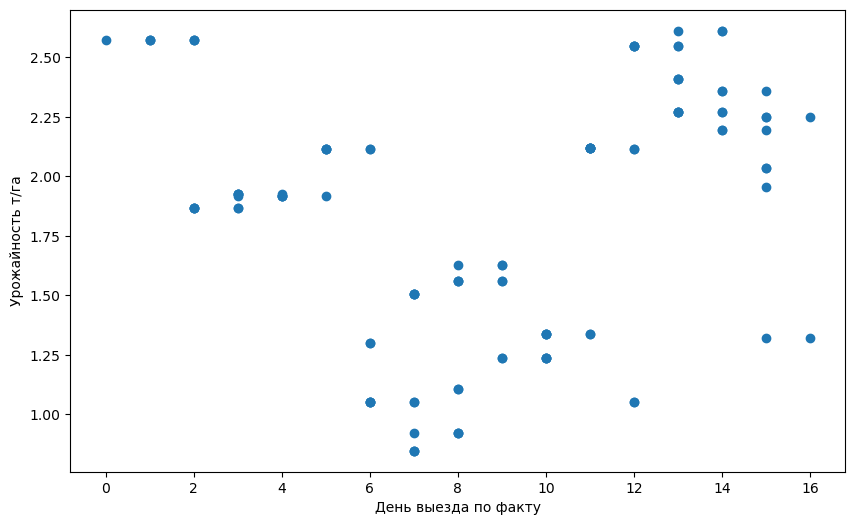

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df1['День выезда по факту'], y = df1['Урожайность т/га'])
plt.xlabel("День выезда по факту")
plt.ylabel("Урожайность т/га")

Рассчитаем коэффициент корреляции Пирсона и двустороннее p-значение:

In [20]:
pearsonr(df1['День выезда по факту'], df1['Урожайность т/га'])

PearsonRResult(statistic=0.13568658238935388, pvalue=0.15186723400209276)

Исходя из хаотичного графика рассеяния и низкого коэффициента Пирсона = 0.14, а также двустороннего p-значение больше 5%, мы можем сделать вывод, что статистически значимой корреляции между двумя признаками нет.

### г	Химический состав поля (колонки M, N, O, P) и Урожайность (колонка J)

Зададим переменные.

In [21]:
X = df[['Фосфор', 'Калий', 'Азот', 'Гумус']]

y = df['Урожайность т/га']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                               test_size=0.3, random_state=10)

In [22]:
X

,Фосфор,Калий,Азот,Гумус
0,51.40,370.0,82.6,6.9
1,51.40,370.0,82.6,6.9
2,51.40,370.0,82.6,6.9
3,51.40,370.0,82.6,6.9
4,51.40,370.0,82.6,6.9
...,...,...,...,...
1787,24.55,337.5,66.5,8.2
1788,24.55,337.5,66.5,8.2
1789,24.55,337.5,66.5,8.2
1790,24.55,337.5,66.5,8.2


In [23]:
y

0       1.955862
1       1.955862
2       1.955862
3       1.955862
4       1.955862
          ...   
1787    1.626667
1788    1.626667
1789    1.626667
1790    1.626667
1791    1.626667
Name: Урожайность т/га, Length: 1625, dtype: float64

Рассчитаем показатель Variance inflation factor (VIF) или коэффициент увеличения дисперсии, который позволяет выявить корреляцию между признаками модели

In [24]:
X_incl_const = sm.add_constant(X_train)
vif =[variance_inflation_factor (exog=X_incl_const.values, 
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns,
             'vif':np.around(vif, 2)})

,coef_name,vif
0,const,421.12
1,Фосфор,1.61
2,Калий,1.50
3,Азот,1.17
4,Гумус,1.18


Расчет показателя свидетельствует об очень низкой корреляции между независимыми признаками. (при VIF = 1 взаимосвязь отсутвует, при VIF > 5 - высокая корреляция).

Рассчитаем коэффициенты линейной регрессии для модели и показатель R2

In [25]:
regressor = LinearRegression()
regressor.fit(X, y)

print('intercept:', regressor.intercept_)
print('coefficients:', regressor.coef_)
print('R2:', regressor.score(X,y))

intercept: 1.687443058599387
coefficients: [ 0.02516281 -0.00273278 -0.0323388   0.35124185]
R2: 0.3574425753633237


Исходя из показателя R2 = 0.36 корреляция между химическим составом поля и урожайностью незначительная.

### д	Факторы погоды (колонки S, T, U) и Урожайность (колонка J)


Для установления взаимосвязи показателей погоды и урожайности предварительно необходимо убрать нулевые значения показателей погоды, так как данные признаки заполнены только по набюдениям в период цветения и вегетации.

In [26]:
df2 = df[df['Влага в период вегетации, мм'] != 0].copy()
df2

,Номерной знак ТС,Название объекта,Имя сотр./кандидата,Тех.операция,Поле,Кол-во ГА,День выезда по факту,Культура 2021,Урожайность т/га,Гибрид,Макс NDVI,Фосфор,Калий,Азот,Гумус,Ср.Ур-сть т/га,Диапазон Мин NDVI,℃ в Период цветения,"Влага в период вегетации, мм","Накопленная влага всего, мм"
388,19,John Deere 8430,3,Боронование,16,10.00,2021-04-18,Подсолнечник,1.236667,ЕС Генезис,0.67,35.20,605.0,66.5,7.53,1.64,1,28,180,378
389,19,John Deere 8430,3,Посев пропашных культур,16,28.00,2021-05-21,Подсолнечник,1.236667,ЕС Генезис,0.67,35.20,605.0,66.5,7.53,1.64,1,28,180,378
390,19,John Deere 8430,3,Посев пропашных культур,16,60.00,2021-05-22,Подсолнечник,1.236667,ЕС Генезис,0.67,35.20,605.0,66.5,7.53,1.64,1,28,180,378
391,22,John Deere 9430,7,Культивация с вн м/у 100 кг/га (6-8 см),16,29.00,2021-05-20,Подсолнечник,1.236667,ЕС Генезис,0.67,35.20,605.0,66.5,7.53,1.64,1,28,180,378
392,22,John Deere 9430,7,Культивация с вн м/у 100 кг/га (6-8 см),16,29.00,2021-05-21,Подсолнечник,1.236667,ЕС Генезис,0.67,35.20,605.0,66.5,7.53,1.64,1,28,180,378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,26,Claas Tucano 450,20,"Уборка подсолнечника 1,5-2,0 т/га",33,12.90,2021-09-19,Подсолнечник,1.626667,ЕС Генезис,0.67,24.55,337.5,66.5,8.20,1.64,1,37,181,378
1788,23,Claas Tucano 450,22,"Уборка подсолнечника 1,5-2,0 т/га",33,11.47,2021-09-19,Подсолнечник,1.626667,ЕС Генезис,0.67,24.55,337.5,66.5,8.20,1.64,1,37,181,378
1789,19,John Deere 8430,27,Дискование (8-12 см),33,43.00,2021-10-16,Подсолнечник,1.626667,ЕС Генезис,0.67,24.55,337.5,66.5,8.20,1.64,1,37,181,378
1790,19,John Deere 8430,27,Дискование (8-12 см),33,34.00,2021-10-17,Подсолнечник,1.626667,ЕС Генезис,0.67,24.55,337.5,66.5,8.20,1.64,1,37,181,378


Зададим переменные.

In [27]:
X = df2[['℃ в Период цветения', 'Влага в период вегетации, мм', 'Накопленная влага всего, мм']]

y = df2['Урожайность т/га']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                               test_size=0.3, random_state=10)

In [28]:
X

,℃ в Период цветения,"Влага в период вегетации, мм","Накопленная влага всего, мм"
388,28,180,378
389,28,180,378
390,28,180,378
391,28,180,378
392,28,180,378
...,...,...,...
1787,37,181,378
1788,37,181,378
1789,37,181,378
1790,37,181,378


In [29]:
y

388     1.236667
389     1.236667
390     1.236667
391     1.236667
392     1.236667
          ...   
1787    1.626667
1788    1.626667
1789    1.626667
1790    1.626667
1791    1.626667
Name: Урожайность т/га, Length: 1093, dtype: float64

Рассчитаем показатель VIF.

In [30]:
X_incl_const = sm.add_constant(X_train)
vif =[variance_inflation_factor (exog=X_incl_const.values, 
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns,
             'vif':np.around(vif, 2)})

,coef_name,vif
0,const,19799.21
1,℃ в Период цветения,1.47
2,"Влага в период вегетации, мм",3.18
3,"Накопленная влага всего, мм",2.66


Расчет показателя свидетельствует о низкой корреляции между независимыми признаками.

Рассчитаем коэффициенты линейной регрессии для модели и показатель R2

In [31]:
regressor = LinearRegression()
regressor.fit(X, y)

print('intercept:', regressor.intercept_)
print('coefficients:', regressor.coef_)
print('R2:', regressor.score(X,y))

intercept: 3.315475577082906
coefficients: [ 0.00141391  0.01679024 -0.01311605]
R2: 0.15919661770109916


Исходя из показателя R2 = 0.16 корреляция между погодными условиями и урожайностью незначительная.

# 4. (2.) 	Постройте модель зависимости урожайности (колонка J) от факторов температура (колонка S), влага (T), накопленная влага (U), гибрид (K)
### Оцените качество модели

Для построения модели воспользуемся датасетом из п. 1.д, при этом признак Гибрид имеет 2 уникальных значения, закодируем Label Encoder. ЕС Генезис - 0,  ЛГ-50635 - 1.


In [32]:
le_hybrid = LabelEncoder()
le_hybrid.fit(df2['Гибрид'])
df2['Гибрид'] = le_hybrid.transform(df2['Гибрид'])

Зададим переменные.

In [33]:
X = df2[['℃ в Период цветения', 'Влага в период вегетации, мм', 
         'Накопленная влага всего, мм', 'Гибрид']]

y = df2['Урожайность т/га']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                               test_size=0.3, random_state=10)

In [34]:
X

,℃ в Период цветения,"Влага в период вегетации, мм","Накопленная влага всего, мм",Гибрид
388,28,180,378,0
389,28,180,378,0
390,28,180,378,0
391,28,180,378,0
392,28,180,378,0
...,...,...,...,...
1787,37,181,378,0
1788,37,181,378,0
1789,37,181,378,0
1790,37,181,378,0


In [35]:
y

388     1.236667
389     1.236667
390     1.236667
391     1.236667
392     1.236667
          ...   
1787    1.626667
1788    1.626667
1789    1.626667
1790    1.626667
1791    1.626667
Name: Урожайность т/га, Length: 1093, dtype: float64

Рассчитаем показатель VIF.

In [36]:
X_incl_const = sm.add_constant(X_train)
vif =[variance_inflation_factor (exog=X_incl_const.values, 
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns,
             'vif':np.around(vif, 2)})

,coef_name,vif
0,const,19871.27
1,℃ в Период цветения,1.49
2,"Влага в период вегетации, мм",3.38
3,"Накопленная влага всего, мм",2.74
4,Гибрид,1.54


Расчет показателя свидетельствует о низкой корреляции между независимыми признаками.

Рассчитаем коэффициенты линейной регрессии для модели и показатель R2

In [37]:
regressor = LinearRegression()
regressor.fit(X, y)

print('intercept:', regressor.intercept_)
print('coefficients:', regressor.coef_)
print('R2:', regressor.score(X,y))

intercept: 8.810104169644084
coefficients: [ 0.01083537 -0.0341178  -0.00458596  0.94414066]
R2: 0.7982760949050941


Исходя их показателя R2 = 0.80 корреляция между погодными условиями с учетом гибрида и урожайностью - высокая, в отличие от зависимости только от погодных условий без выбора гибрида.
Линейная формула урожайности данной модели выглядит следующим образом:

#### Урожайность т/га = 8,8101 + 0,0108x℃ в Период цветения - 0,0341xВлага в период вегетации, мм - 0,0046xНакопленная влага всего, мм + 0,9441xГибрид, 
где гибрид = 0 - ЕС Генезис,
    гибрид = 1 - ЛГ-50635.

Данная модель показывает, что для набюдений, полученных в период цветения и вегетации на урожайность оказывает влияние выбранный вид гибрида: у гибрида ЛГ-50635 урожайность больше, чем у ЕС Генезис. Влияние погодых фаторов минимально.

Модель хорошо подходит для оценки урожайности, особенно гибрида ЛГ-50635. При этом значение детерминанты R2 = 0,80 недостаточно близко к 1. В связи с чем необходимо попытаться улучшить качество модели.
Для улучшения модели можно поменять набор независимых признаков, сделать их отбор в рамках модели линейной регрессии, либо возможно необходимо поменять вид регрессии или выбрать другую модель машинного обучения.

# 5. (3.)	Оцените, как повлияет на модель, построенную в пункте 2, учет таких факторов как день выезда для операций посева, вид используемой техники

#### День выезда для операций посева:

Для построения модели воспользуемся датасетом из п. 2, с отбором "Тех.операция" = "Посев пропашных культур".

In [38]:
df3 = df2[df2['Тех.операция'] == 'Посев пропашных культур'].copy()
df3

,Номерной знак ТС,Название объекта,Имя сотр./кандидата,Тех.операция,Поле,Кол-во ГА,День выезда по факту,Культура 2021,Урожайность т/га,Гибрид,Макс NDVI,Фосфор,Калий,Азот,Гумус,Ср.Ур-сть т/га,Диапазон Мин NDVI,℃ в Период цветения,"Влага в период вегетации, мм","Накопленная влага всего, мм"
389,19,John Deere 8430,3,Посев пропашных культур,16,28.0,2021-05-21,Подсолнечник,1.236667,0,0.67,35.2000,605.0,66.5000,7.53,1.64,1,28,180,378
390,19,John Deere 8430,3,Посев пропашных культур,16,60.0,2021-05-22,Подсолнечник,1.236667,0,0.67,35.2000,605.0,66.5000,7.53,1.64,1,28,180,378
396,5,John Deere 8430,10,Посев пропашных культур,16,63.0,2021-05-21,Подсолнечник,1.236667,0,0.67,35.2000,605.0,66.5000,7.53,1.64,1,28,180,378
397,5,John Deere 8430,10,Посев пропашных культур,16,74.0,2021-05-22,Подсолнечник,1.236667,0,0.67,35.2000,605.0,66.5000,7.53,1.64,1,28,180,378
418,5,John Deere 8430,23,Посев пропашных культур,16,62.0,2021-05-22,Подсолнечник,1.236667,0,0.67,35.2000,605.0,66.5000,7.53,1.64,1,28,180,378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,19,John Deere 8430,27,Посев пропашных культур,32,3.0,2021-05-19,Подсолнечник,1.562080,0,0.66,29.3325,340.0,77.4675,7.93,1.64,1,37,180,378
1115,19,John Deere 8430,27,Посев пропашных культур,32,69.0,2021-05-21,Подсолнечник,1.562080,0,0.66,29.3325,340.0,77.4675,7.93,1.64,1,37,180,378
1123,5,John Deere 8430,10,Посев пропашных культур,33,4.0,2021-05-19,Подсолнечник,1.626667,0,0.67,24.5500,337.5,66.5000,8.20,1.64,1,37,181,378
1124,5,John Deere 8430,10,Посев пропашных культур,33,10.0,2021-05-21,Подсолнечник,1.626667,0,0.67,24.5500,337.5,66.5000,8.20,1.64,1,37,181,378


Закодируем День выезда по факту с помощью LabelEncoder

In [39]:
le_date = LabelEncoder()
le_date.fit(df3['День выезда по факту'])
df3['День выезда по факту'] = le_date.transform(df3['День выезда по факту'])

Зададим переменные.

In [40]:
X = df3[['℃ в Период цветения', 'Влага в период вегетации, мм', 
         'Накопленная влага всего, мм', 'Гибрид', 'День выезда по факту']]

y = df3['Урожайность т/га']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                               test_size=0.3, random_state=10)

In [41]:
X

,℃ в Период цветения,"Влага в период вегетации, мм","Накопленная влага всего, мм",Гибрид,День выезда по факту
389,28,180,378,0,9
390,28,180,378,0,10
396,28,180,378,0,9
397,28,180,378,0,10
418,28,180,378,0,10
...,...,...,...,...,...
1114,37,180,378,0,8
1115,37,180,378,0,9
1123,37,181,378,0,8
1124,37,181,378,0,9


In [42]:
y

389     1.236667
390     1.236667
396     1.236667
397     1.236667
418     1.236667
          ...   
1114    1.562080
1115    1.562080
1123    1.626667
1124    1.626667
1137    1.626667
Name: Урожайность т/га, Length: 81, dtype: float64

Рассчитаем показатель VIF.

In [43]:
X_incl_const = sm.add_constant(X_train)
vif =[variance_inflation_factor (exog=X_incl_const.values, 
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns,
             'vif':np.around(vif, 2)})

,coef_name,vif
0,const,24927.48
1,℃ в Период цветения,1.73
2,"Влага в период вегетации, мм",4.50
3,"Накопленная влага всего, мм",3.37
4,Гибрид,2.48
5,День выезда по факту,4.55


Расчет показателя свидетельствует о низкой корреляции между независимыми признаками.

Рассчитаем коэффициенты линейной регрессии для модели и показатель R2

In [44]:
regressor = LinearRegression()
regressor.fit(X, y)

print('intercept:', regressor.intercept_)
print('coefficients:', regressor.coef_)
print('R2:', regressor.score(X,y))

intercept: 11.254458445872421
coefficients: [ 0.01131913 -0.04886156 -0.00331957  0.9407454  -0.02862082]
R2: 0.8378418752261056


Исходя их показателя R2 = 0.84 корреляция между погодными условиями с учетом гибрида и урожайностью - высокая, еще больше, чем предыдущая модель, в которой не учитывался день выезда и не было отбора операций посева.
Линейная формула урожайности данной модели выглядит следующим образом:

#### Урожайность т/га = 11,2545 + 0,0113x℃ в Период цветения - 0,0489xВлага в период вегетации, мм - 0,0033xНакопленная влага всего, мм + 0,9407xГибрид - 0,0286 x День выезда по факту,

где гибрид = 0 - ЕС Генезис,
    гибрид = 1 - ЛГ-50635,
    День выезда по факту = 0 - 05.05.21,
                           1 - 06.05.21,
                           2 - 07.05.21,
                           3 - 08.05.21,
                           4 - 09.05.21,
                           5 - 16.05.21,
                           6 - 17.05.21,
                           7 - 18.05.21,
                           8 - 19.05.21,
                           9 - 21.05.21,
                           10 - 22.05.21,
                           11 - 23.05.21,
                           12 - 24.05.21
                           

#### Вид используемой техники

Посмотрим виды используемой техники для модели, учитывающей день выезда по факту с отбором по операциям посева.

In [45]:
df3[['Название объекта', 'Номерной знак ТС']].nunique()

Название объекта    1
Номерной знак ТС    2
dtype: int64

In [46]:
df3[['Название объекта', 'Номерной знак ТС']]


,Название объекта,Номерной знак ТС
389,John Deere 8430,19
390,John Deere 8430,19
396,John Deere 8430,5
397,John Deere 8430,5
418,John Deere 8430,5
...,...,...
1114,John Deere 8430,19
1115,John Deere 8430,19
1123,John Deere 8430,5
1124,John Deere 8430,5


Исходя из полученной информации необходимо отсортировать по технику по номерам и закодировать с помощью LabelEncoder.

In [47]:
le_numberts = LabelEncoder()
le_numberts.fit(df3['Номерной знак ТС'])
df3['Номерной знак ТС'] = le_numberts.transform(df3['Номерной знак ТС'])

Для построения модели воспользуемся датасетом из п. 3.1.

Зададим переменные.

In [48]:
X = df3[['℃ в Период цветения', 'Влага в период вегетации, мм', 
         'Накопленная влага всего, мм', 'Гибрид', 'День выезда по факту', 'Номерной знак ТС']]

y = df3['Урожайность т/га']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                               test_size=0.3, random_state=10)

In [49]:
X

,℃ в Период цветения,"Влага в период вегетации, мм","Накопленная влага всего, мм",Гибрид,День выезда по факту,Номерной знак ТС
389,28,180,378,0,9,1
390,28,180,378,0,10,1
396,28,180,378,0,9,0
397,28,180,378,0,10,0
418,28,180,378,0,10,0
...,...,...,...,...,...,...
1114,37,180,378,0,8,1
1115,37,180,378,0,9,1
1123,37,181,378,0,8,0
1124,37,181,378,0,9,0


In [50]:
y

389     1.236667
390     1.236667
396     1.236667
397     1.236667
418     1.236667
          ...   
1114    1.562080
1115    1.562080
1123    1.626667
1124    1.626667
1137    1.626667
Name: Урожайность т/га, Length: 81, dtype: float64

Рассчитаем показатель VIF.

In [51]:
X_incl_const = sm.add_constant(X_train)
vif =[variance_inflation_factor (exog=X_incl_const.values, 
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns,
             'vif':np.around(vif, 2)})

,coef_name,vif
0,const,24990.82
1,℃ в Период цветения,1.74
2,"Влага в период вегетации, мм",4.51
3,"Накопленная влага всего, мм",3.52
4,Гибрид,2.48
5,День выезда по факту,4.68
6,Номерной знак ТС,1.07


Расчет показателя свидетельствует о низкой корреляции между независимыми признаками.

Рассчитаем коэффициенты линейной регрессии для модели и показатель R2

In [52]:
regressor = LinearRegression()
regressor.fit(X, y)

print('intercept:', regressor.intercept_)
print('coefficients:', regressor.coef_)
print('R2:', regressor.score(X,y))

intercept: 11.219906558370411
coefficients: [ 0.01141747 -0.04868751 -0.00333403  0.93958542 -0.02853213  0.00969241]
R2: 0.8379369846098551


Исходя их показателя R2 = 0.84 корреляция между погодными условиями с учетом гибрида и урожайностью - высокая, и на 0,0001 больше предыдущей модели, в которой учитывался день выезда и былл отбор операций посева.
Линейная формула урожайности данной модели выглядит следующим образом:

#### Урожайность т/га = 11,2199 + 0,0114 x ℃ в Период цветения - 0,0489 x Влага в период вегетации, мм - 0,0033 x Накопленная влага всего, мм + 0,9396 x Гибрид - 0,0285 x День выезда по факту + 0,0097 x Номерной знак ТС,

где гибрид = 0 - ЕС Генезис,
    гибрид = 1 - ЛГ-50635,
    День выезда по факту = 0 - 05.05.21,
                           1 - 06.05.21,
                           2 - 07.05.21,
                           3 - 08.05.21,
                           4 - 09.05.21,
                           5 - 16.05.21,
                           6 - 17.05.21,
                           7 - 18.05.21,
                           8 - 19.05.21,
                           9 - 21.05.21,
                           10 - 22.05.21,
                           11 - 23.05.21,
                           12 - 24.05.21;
    Номерной знак ТС = 0 - №19 по факту,
                       1 - №5 по факту 